In [55]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [84]:
"""
Count  the  outcome  as  an  error  
if  the  outcome  bit  string  for  a  particular  state  has  odd  parity.
Determine the error rate for each state.
5.  Fit the error rates for differentnfor each basisPto a quadraticaPn2+bPn+cP.
6.  Letθ2=aX+aY+aZandv2P=aP/θ2.  These are the parameters of the coherent error in thechannelCr.
"""

def count_errors(counts):
    errors = 0
    total_counts = sum(counts.values())
    for state in counts:
        sum_bits = sum([int(k) for k in list(state)])
        if sum_bits % 2 == 1:
            errors += counts[state]
    return errors * 1.0 / total_counts


def err_func(x, a, b, c):
    return a * (x ** 2) + b * x + c


def get_coherent_error_params(n, x_err, y_err, z_err):
    px = np.polyfit(n, x_err, 2)
    py = np.polyfit(n, y_err, 2)
    pz = np.polyfit(n, z_err, 2)
    theta_square = px[0] + py[0] + pz[0]
    vx_square = px[0] / theta_square
    vy_square = py[0] / theta_square
    vz_square = pz[0] / theta_square
    print(px)
    print(py)
    print(pz)
    print(vx_square)
    
def plot_fit(f, xdata, ydata):
    popt, pcov = curve_fit(f, xdata, ydata)
    #popt = np.polyfit(xdata, ydata, 2)
    plt.subplot()
    plt.title('curve_fit')
    new_ydata = [f(x, *popt) for x in xdata]
    plt.plot(xdata, new_ydata, 'r-',
             label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
    plt.xlabel('n')
    plt.ylabel('err')
    plt.show()


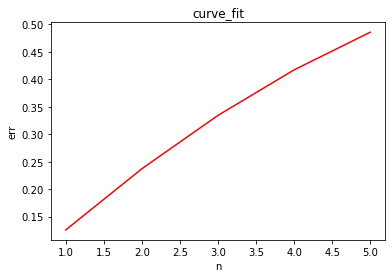

In [83]:
plot_fit(err_func, n, z_err)